# Bitwise operations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def imshow(img):
    plt.figure(figsize = (10,7))
    plt.imshow(img)

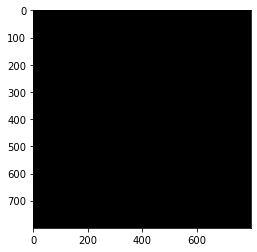

In [3]:
# With numpy create a black canvas of size 800 x 800 
canvas = np.zeros((800,800),np.uint8)
plt.imshow(canvas,cmap ='gray')

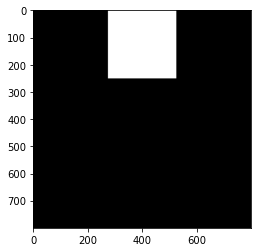

In [4]:
# Make a copy of the canvas and draw a white square of size 250 x 250 on top of the copy of the canvas
square = canvas.copy()
cv2.rectangle(square, (275,0),(525,250),255,-1)
plt.imshow(square,cmap='gray')

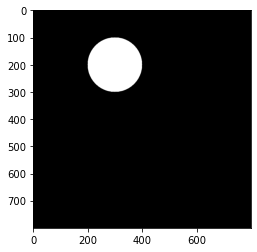

In [5]:
# Make a copy of the origina lcanvas and draw a white circle of size 200 x 200 on top of the copy of the canvas
# Make sure the circle is in a different position of the canvas than the square
circle = canvas.copy()
cv2.circle(circle,(300,200),100,255,-1 )
plt.imshow(circle,cmap='gray')

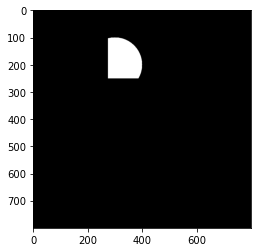

In [6]:
# Create a new image and merge both previous images (square and circle) with a bitwise and operation

img_and = cv2.bitwise_and(square,circle) #order dont change
plt.imshow(img_and, cmap='gray')

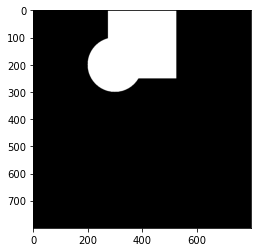

In [7]:
# Create a new image and merge both previous images (square and circle) with a bitwise or operation
img_or = cv2.bitwise_or(square,circle)
plt.imshow(img_or, cmap='gray')

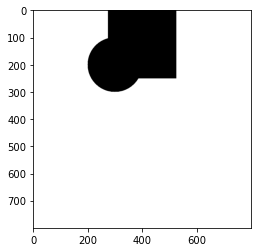

In [8]:
# Create a new image and merge both previous images (square and circle) with a bitwise not operation
img_not = cv2.bitwise_not(img_or)
plt.imshow(img_not, cmap='gray')

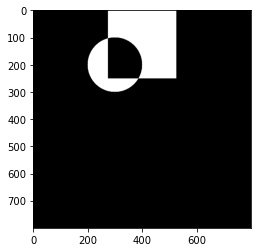

In [9]:
# Create a new image and merge both previous images (square and circle) with a bitwise xor operation
img_xor = cv2.bitwise_xor(square,circle)
plt.imshow(img_xor, cmap='gray')

In [10]:
!ls img

4.png                day4.jpg             noisy.png
blue-flowers.jpg     fry.png              notes.png
blue-red-flowers.png n.png                purple-flowers.jpg
clean-text.jpg       night                scan.jpg
day                  night1.jpg           sketch.png
day1.jpg             night2.jpg           text.png
day2.jpg             night3.png
day3.jpg             night4.jpg


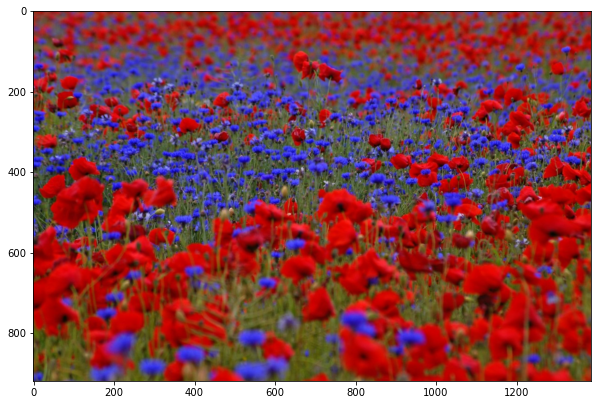

In [11]:
# Load a color image and convert it to HSV
# Identify a prominent color from the image and filter it out
# Create a mask for that color and apply a bitwise and specifying the mask to show only this part of the image
img = cv2.imread('img/blue-red-flowers.png')
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
imshow(rgb_img)

In [20]:
h, w = rgb_img.shape[:2]

1386

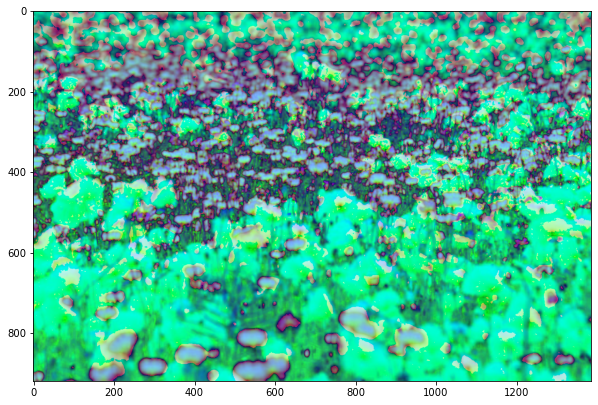

In [12]:
imshow(hsv_img)

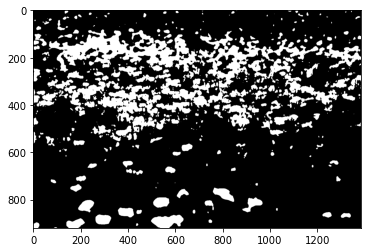

In [13]:
# hsv image
lower_range = (90,20,0)
upper_range = (140,255,255)

mask = cv2.inRange(hsv_img, lower_range, upper_range)
plt.imshow(mask,'gray')


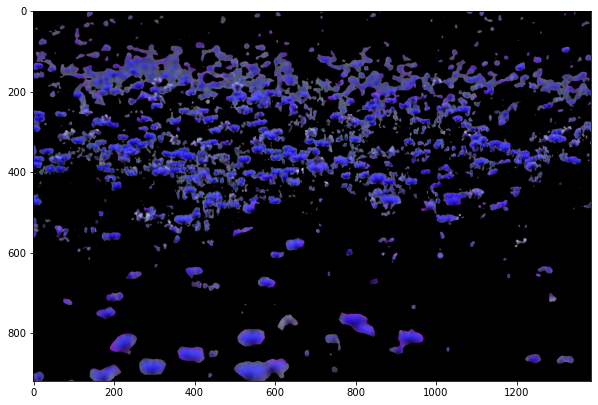

In [14]:
# hsv image
lower_range = (90,20,0)
upper_range = (140,255,255)

mask = cv2.inRange(hsv_img, lower_range, upper_range)
masked = rgb_img.copy()
masked[mask==0] = [0,0,0]
#plt.imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB))
imshow(masked)


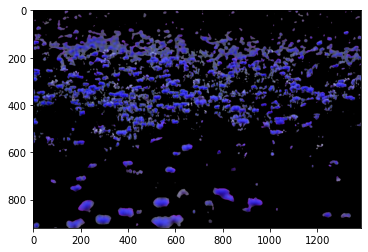

In [15]:
# Create a new image and merge both previous images (square and circle) with a bitwise and operation
img_and = cv2.bitwise_and(masked,rgb_img) #order dont change
plt.imshow(img_and, cmap='gray')

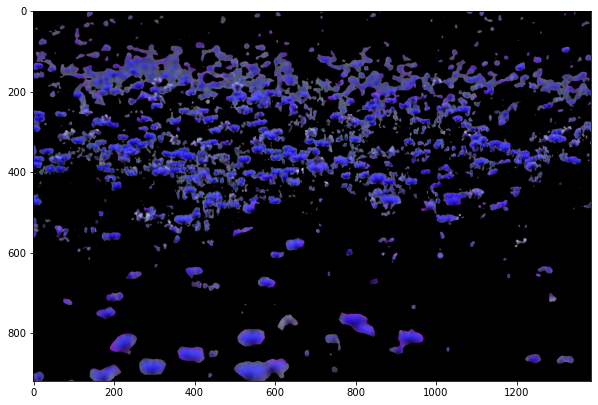

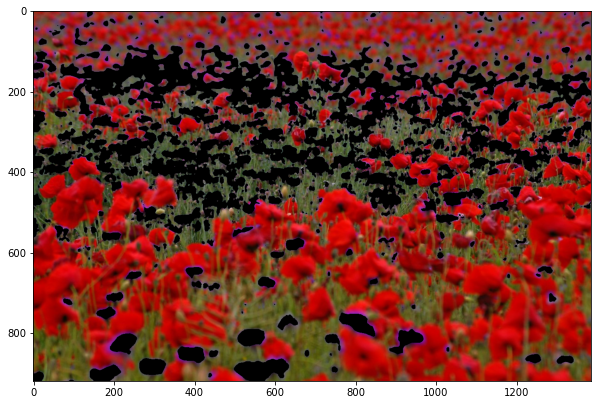

In [16]:
# With the same image and mask you have created above now apply a bitwise not specifying the mask 
# to show everything but the color you masked out before
mask = cv2.inRange(hsv_img, lower_range, upper_range)
masked = rgb_img.copy()
masked[mask!=0] = [0,0,0]
#plt.imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB))
imshow(masked)

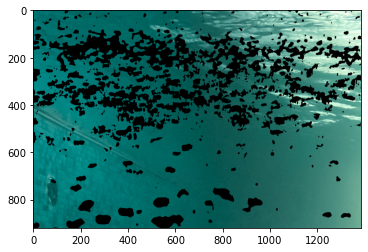

In [25]:
background_image = cv2.imread('img/underwater.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

crop_background = background_image[0:h, 0:w]

crop_background[mask != 0] = [0, 0, 0]

plt.imshow(crop_background)

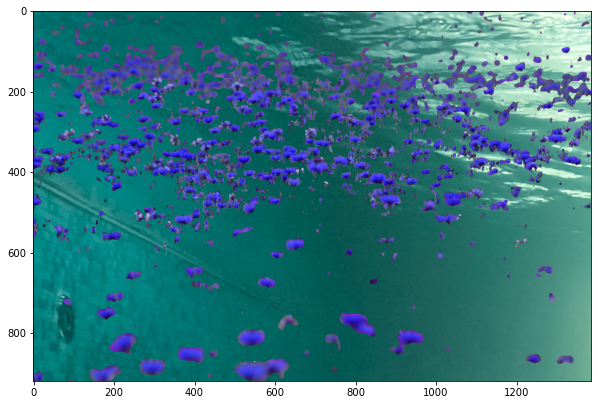

In [27]:
final_image = crop_background + img_and
imshow(final_image)